In [1]:
import pandas as pd
import numpy as np
import librosa 
import IPython.display as ipd #palying audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import os
import csv
import soundfile
import sklearn
from matplotlib.colors import Normalize
import glob
from scipy.stats import kurtosis, skew

In [2]:
path = os.chdir('C:/Users/makye/OneDrive/Documents/Career/BeCode/study/Data_preprocessing/audioProcessing/fan')
print(os.getcwd())


C:\Users\makye\OneDrive\Documents\Career\BeCode\study\Data_preprocessing\audioProcessing\fan


In [3]:
#Individual functions for targeted features
# file= ('0_dB_slider/slider/id_00/abnormal/00000000.wav')

def getfeature(file):
    
    wave , sr = librosa.load(file)
    
    chroma= librosa.feature.chroma_stft(y=wave, sr=sr)
    chroma_stft = (np.mean(chroma), np.amin(chroma), np.amax(chroma), np.std(chroma), 
                   np.median(chroma))
    
    mel = librosa.feature.melspectrogram(y=wave, sr=sr)
    mel_spec = (np.mean(mel), np.amin(mel), np.amax(mel), np.std(mel), 
                   np.median(mel))
    
    
    rmse = librosa.feature.rms(y=wave)
    rms_f = (np.mean(rmse), np.amin(rmse), np.amax(rmse), np.std(rmse), 
                   np.median(rmse))
    
    spec = librosa.feature.spectral_centroid(y=wave, sr=sr)
    spec_cent = (np.mean(spec), np.amin(spec), np.amax( spec), np.std(spec), 
                   np.median(spec))
    
    
    specb = librosa.feature.spectral_bandwidth(y=wave, sr=sr)
    spec_bw = (np.mean(specb), np.amin(specb), np.amax( specb), np.std(specb), 
                   np.median(specb))
    
    roll = librosa.feature.spectral_rolloff(y=wave, sr=sr)
    rolloff = (np.mean(roll), np.amin(roll), np.amax(roll), np.std(roll), 
                   np.median(roll))
    
    
    zcr = librosa.feature.zero_crossing_rate(wave)
    zcrf = (np.mean(zcr), np.amin(zcr), np.amax(zcr), np.std(zcr), 
                   np.median(zcr))
    
    mfcc_mean  = np.mean(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0)
    mfcc_min  = np.amin(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0)
    mfcc_max  = np.amax(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0) 
    mfcc_std  = np.std(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0) 
    mfcc_med = np.median(librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=40).T, axis=0) 
    
    list_features = (chroma_stft, mel_spec, rms_f, spec_cent, spec_bw, rolloff, zcrf,  
                     mfcc_mean,  mfcc_min,  mfcc_max,  mfcc_std,  mfcc_med)
    
    feature_matrix=np.array([])
    # use np.hstack to stack our feature arrays horizontally to create a feature matrix
    feature_matrix = np.hstack((list_features))

    return feature_matrix
    

In [4]:
#load our entire dataset and compute the features of each audio file

def load_data():
    
    X,y=[],[]
    
    count = 0
    holder = ['normal', 'abnormal']
    for i in holder:
        v = f'*_dB_fan/fan/id_*/{i}/*.wav'
        if i == 'normal':
            target = 0
        else:
            target = 1
            
    
        for file in glob.glob(v):
            file_name=os.path.basename(file)
            features = getfeature(file)
            X.append(features)
            y.append(target)
            count += 1
            
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{4205} audio samples',end=' ')
        
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)


In [5]:
features, target = load_data()

 Processed 12225/4205 audio samples 

C:\Users\makye\anaconda3\envs\AudioProcessing\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


 Processed 16650/4205 audio samples 

In [7]:

print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features) 
features_df


Audio samples represented: 16650
Numerical features extracted per sample: 235


,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,0.521068,0.070138,1.0,0.245642,0.465831,0.024667,1.103050e-16,2.026740,0.089876,0.000809,...,-1.183580,-3.753345,0.622553,-4.079293,1.717946,-3.843680,-0.487058,-2.564343,0.322444,0.917312
1,0.299771,0.017528,1.0,0.265553,0.213866,0.019055,1.071334e-16,2.098461,0.071708,0.000670,...,-7.508953,-8.349066,1.373964,-0.905749,6.431675,-3.730001,-1.026688,-10.680933,-1.292613,-0.065263
2,0.572170,0.104147,1.0,0.228203,0.538895,0.024145,1.138664e-16,2.024810,0.086656,0.001122,...,-1.553520,-3.709635,0.854858,-3.137182,2.921020,-4.522874,0.525052,-2.096044,1.620852,-0.046381
3,0.267712,0.011508,1.0,0.264279,0.172998,0.018542,6.822672e-17,1.953995,0.069519,0.000759,...,-8.764864,-8.420304,1.540284,1.031072,7.787944,-4.283603,-2.514720,-11.966341,-0.660952,0.172838
4,0.618555,0.082517,1.0,0.228066,0.603731,0.027033,7.384542e-17,5.976659,0.133491,0.000522,...,-0.641905,-3.783180,0.049001,-6.064190,0.445893,-2.652442,-0.507077,-0.795199,1.559489,-1.077695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0.400031,0.031603,1.0,0.258837,0.325987,0.001638,7.829068e-18,0.120201,0.004660,0.000151,...,-4.379579,-3.875598,3.577491,1.672403,6.316190,-4.967726,-1.522773,-11.896156,0.828754,2.924010
16646,0.540105,0.088919,1.0,0.241641,0.502585,0.001934,1.016532e-17,0.140854,0.006783,0.000133,...,-0.234316,-2.293127,0.059403,-3.409543,3.455919,-2.844171,3.320866,-7.180709,0.096450,-0.153845
16647,0.561690,0.066326,1.0,0.238738,0.524885,0.001950,8.418404e-18,0.207043,0.008274,0.000123,...,-0.604638,-3.556032,-0.587981,-3.043593,3.426149,-2.318453,3.284101,-7.141550,-0.408158,0.170186
16648,0.448597,0.019700,1.0,0.252496,0.387905,0.001632,8.850527e-18,0.114017,0.004414,0.000173,...,-4.669513,-7.400671,-0.611357,-0.405908,7.716073,-2.470002,0.187876,-13.708086,-4.265595,-2.957150


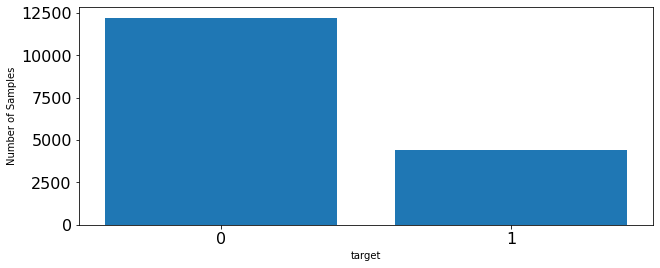

In [8]:
#Imbalances in the target dataset

# plot target
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)

#np.unique returns ordered list of unique elements and count of each element
target_list, count = np.unique(target, return_counts=True)
plt.bar(x=range(2), height=count)
plt.xticks(ticks=range(2), labels = [target for target in target_list],fontsize=10)
plt.xlabel('target')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

In [9]:
# Adding target to features dataframe
features_df['target'] = target.tolist()

features_df

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,target
0,0.521068,0.070138,1.0,0.245642,0.465831,0.024667,1.103050e-16,2.026740,0.089876,0.000809,...,-3.753345,0.622553,-4.079293,1.717946,-3.843680,-0.487058,-2.564343,0.322444,0.917312,0
1,0.299771,0.017528,1.0,0.265553,0.213866,0.019055,1.071334e-16,2.098461,0.071708,0.000670,...,-8.349066,1.373964,-0.905749,6.431675,-3.730001,-1.026688,-10.680933,-1.292613,-0.065263,0
2,0.572170,0.104147,1.0,0.228203,0.538895,0.024145,1.138664e-16,2.024810,0.086656,0.001122,...,-3.709635,0.854858,-3.137182,2.921020,-4.522874,0.525052,-2.096044,1.620852,-0.046381,0
3,0.267712,0.011508,1.0,0.264279,0.172998,0.018542,6.822672e-17,1.953995,0.069519,0.000759,...,-8.420304,1.540284,1.031072,7.787944,-4.283603,-2.514720,-11.966341,-0.660952,0.172838,0
4,0.618555,0.082517,1.0,0.228066,0.603731,0.027033,7.384542e-17,5.976659,0.133491,0.000522,...,-3.783180,0.049001,-6.064190,0.445893,-2.652442,-0.507077,-0.795199,1.559489,-1.077695,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0.400031,0.031603,1.0,0.258837,0.325987,0.001638,7.829068e-18,0.120201,0.004660,0.000151,...,-3.875598,3.577491,1.672403,6.316190,-4.967726,-1.522773,-11.896156,0.828754,2.924010,1
16646,0.540105,0.088919,1.0,0.241641,0.502585,0.001934,1.016532e-17,0.140854,0.006783,0.000133,...,-2.293127,0.059403,-3.409543,3.455919,-2.844171,3.320866,-7.180709,0.096450,-0.153845,1
16647,0.561690,0.066326,1.0,0.238738,0.524885,0.001950,8.418404e-18,0.207043,0.008274,0.000123,...,-3.556032,-0.587981,-3.043593,3.426149,-2.318453,3.284101,-7.141550,-0.408158,0.170186,1
16648,0.448597,0.019700,1.0,0.252496,0.387905,0.001632,8.850527e-18,0.114017,0.004414,0.000173,...,-7.400671,-0.611357,-0.405908,7.716073,-2.470002,0.187876,-13.708086,-4.265595,-2.957150,1


In [11]:
#CSV dataFrame

def createCsv(df):
    

    df.to_csv('martin_fan40.csv', index=False)
    
createCsv(features_df)